## Python数据分析第10天

### 实战

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
%config InlineBackend.figure_format = 'svg' # 矢量图

In [3]:
sales_df = pd.read_excel('data\ecomm\某电商平台2021年订单数据.xlsx', index_col='id')
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104557 entries, 1 to 104557
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       104557 non-null  object        
 1   userID        104557 non-null  object        
 2   goodsID       104557 non-null  object        
 3   orderAmount   104557 non-null  float64       
 4   payment       104557 non-null  float64       
 5   chanelID      104549 non-null  object        
 6   platfromType  104557 non-null  object        
 7   orderTime     104557 non-null  datetime64[ns]
 8   payTime       104557 non-null  datetime64[ns]
 9   chargeback    104557 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(2), object(5)
memory usage: 8.1+ MB


In [4]:
sales_df

,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
1,sys-2020-254118088,customer-157213,JDG-00006491,495.67,495.67,渠道-39,APP,2020-02-14 12:20:36,2021-02-28 13:38:41,False
2,sys-2020-263312190,customer-191121,JDG-00058390,634.04,634.04,渠道-76,微 信,2020-08-14 09:40:34,2021-01-01 14:47:14,True
3,sys-2020-188208169,customer-211918,JDG-00008241,953.73,939.28,渠道-53,薇·信,2020-11-02 20:17:25,2021-01-19 20:06:35,False
4,sys-2020-203314910,customer-201322,JDG-00030253,857.54,760.15,渠道-53,WEB,2020-11-19 10:36:39,2021-08-07 12:24:35,False
5,sys-2020-283989279,customer-120872,JDG-00029046,803.87,795.61,渠道-52,APP,2020-12-26 11:19:16,2021-10-01 07:42:43,False
...,...,...,...,...,...,...,...,...,...,...
104553,sys-2022-268392025,customer-182189,JDG-00008239,433.71,373.55,渠道-56,微 信,2022-01-01 23:30:57,2022-01-01 23:31:09,False
104554,sys-2022-213140521,customer-170057,JDG-00060370,395.14,395.14,渠道-00,APP,2022-01-01 23:31:26,2022-01-01 23:31:36,False
104555,sys-2022-274536228,customer-156592,JDG-00040574,2696.85,2696.85,渠道-98,微 信,2022-01-01 23:46:56,2022-01-01 23:47:06,False


In [5]:
# 选取2021年的数据
sales_df = sales_df[sales_df['orderTime'].dt.year == 2021]
sales_df

,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2021-279103297,customer-146548,JDG-00056475,667.33,667.33,渠道-76,微 信,2021-01-01 00:12:23,2021-01-01 00:13:37,False
7,sys-2021-316686066,customer-104210,JDG-00070902,1834.13,1776.80,渠道-39,薇·信,2021-01-01 00:23:06,2021-01-01 00:23:32,False
8,sys-2021-306447069,customer-104863,JDG-00049963,837.32,818.33,渠道-00,微 信,2021-01-01 01:05:50,2021-01-01 01:06:17,False
9,sys-2021-290267674,customer-206155,JDG-00025318,1144.50,1092.45,渠道-33,APP,2021-01-01 01:16:12,2021-01-01 01:16:25,False
10,sys-2021-337079027,customer-137939,JDG-00076876,641.93,641.93,渠道-52,支付宝,2021-01-01 01:31:00,2021-01-01 01:31:36,False
...,...,...,...,...,...,...,...,...,...,...
104297,sys-2021-344079195,customer-182248,JDG-00081381,1029.81,964.59,渠道-89,薇·信,2021-12-31 23:32:55,2021-12-31 23:33:06,False
104298,sys-2021-296195955,customer-143322,JDG-00093851,1731.61,1580.83,渠道-00,APP,2021-12-31 23:33:05,2021-12-31 23:34:36,True
104299,sys-2021-382387725,customer-220484,JDG-00078257,3624.84,3571.55,渠道-53,网页,2021-12-31 23:37:30,2021-12-31 23:37:44,False


In [6]:
# 重新命名列名
sales_df.rename(columns={'chanelID': 'channelID', 'platfromType': 'platformType'}, inplace=True)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104296 entries, 6 to 104301
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       104296 non-null  object        
 1   userID        104296 non-null  object        
 2   goodsID       104296 non-null  object        
 3   orderAmount   104296 non-null  float64       
 4   payment       104296 non-null  float64       
 5   channelID     104288 non-null  object        
 6   platformType  104296 non-null  object        
 7   orderTime     104296 non-null  datetime64[ns]
 8   payTime       104296 non-null  datetime64[ns]
 9   chargeback    104296 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(2), object(5)
memory usage: 8.1+ MB


C:\Users\wdl\AppData\Local\Temp\ipykernel_9824\3295658410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df.rename(columns={'chanelID': 'channelID', 'platfromType': 'platformType'}, inplace=True)


In [7]:
# 删除支付时间小于下单时间的数据
sales_df = sales_df[sales_df['payTime'] >= sales_df['orderTime']]
sales_df.shape

(104291, 10)

In [8]:
# 支付时间超过30分钟
sales_df = sales_df[sales_df['payTime'] -
                    sales_df['orderTime'] <= pd.Timedelta(minutes=30)]
sales_df.shape


(103354, 10)

In [9]:
sales_df.drop(index=sales_df[(sales_df['payment'] < 0) | (
    sales_df['orderAmount'] < 0)].index, inplace=True)  # 删除支付金额和订单金额小于0的数据
sales_df.shape


(103344, 10)

In [10]:
# 渠道填众数
sales_df['channelID'].fillna(sales_df['channelID'].mode()[0], inplace=True)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103344 entries, 6 to 104301
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       103344 non-null  object        
 1   userID        103344 non-null  object        
 2   goodsID       103344 non-null  object        
 3   orderAmount   103344 non-null  float64       
 4   payment       103344 non-null  float64       
 5   channelID     103344 non-null  object        
 6   platformType  103344 non-null  object        
 7   orderTime     103344 non-null  datetime64[ns]
 8   payTime       103344 non-null  datetime64[ns]
 9   chargeback    103344 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(2), object(5)
memory usage: 8.0+ MB


In [11]:
sales_df['platformType'].replace(r'[\s·]', '', regex=True, inplace=True)
sales_df['platformType'].replace(['薇信', 'vx','VX','APP','WEB','网页','网站'], ['微信', '微信','微信','App','Web','Web','Web'], inplace=True)
sales_df['platformType'].value_counts()

platformType
App    51812
微信     42653
Web     6916
支付宝     1963
Name: count, dtype: int64

In [12]:
# 计算平均折扣
sales_df['discount'] = sales_df.payment / sales_df.orderAmount
# 计算折扣小于等于1的平均值
mean_discount = sales_df[sales_df['discount'] <= 1]['discount'].mean()
# 折扣大于1的支付价格乘以平均折扣,用where函数
sales_df.payment = np.round(sales_df.payment.where(sales_df.discount <= 1, sales_df.orderAmount * mean_discount), 2)


In [13]:
sales_df.drop(columns=['discount'], inplace=True)

In [14]:
sales_df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
6,sys-2021-279103297,customer-146548,JDG-00056475,667.33,667.33,渠道-76,微信,2021-01-01 00:12:23,2021-01-01 00:13:37,False
7,sys-2021-316686066,customer-104210,JDG-00070902,1834.13,1776.80,渠道-39,微信,2021-01-01 00:23:06,2021-01-01 00:23:32,False
8,sys-2021-306447069,customer-104863,JDG-00049963,837.32,818.33,渠道-00,微信,2021-01-01 01:05:50,2021-01-01 01:06:17,False
9,sys-2021-290267674,customer-206155,JDG-00025318,1144.50,1092.45,渠道-33,App,2021-01-01 01:16:12,2021-01-01 01:16:25,False
10,sys-2021-337079027,customer-137939,JDG-00076876,641.93,641.93,渠道-52,支付宝,2021-01-01 01:31:00,2021-01-01 01:31:36,False
...,...,...,...,...,...,...,...,...,...,...
104297,sys-2021-344079195,customer-182248,JDG-00081381,1029.81,964.59,渠道-89,微信,2021-12-31 23:32:55,2021-12-31 23:33:06,False
104298,sys-2021-296195955,customer-143322,JDG-00093851,1731.61,1580.83,渠道-00,App,2021-12-31 23:33:05,2021-12-31 23:34:36,True
104299,sys-2021-382387725,customer-220484,JDG-00078257,3624.84,3571.55,渠道-53,Web,2021-12-31 23:37:30,2021-12-31 23:37:44,False


In [15]:
total_gmv = sales_df.orderAmount.sum() / 10000 # 订单总金额
print(f'订单总金额: {total_gmv:.2f}万元')
total_pay = sales_df.payment.sum() / 10000 # 支付总金额
print(f'支付总金额: {total_pay:.2f}万元')
total_rev = sales_df.query('not chargeback').payment.sum() / 10000 # 实际到账金额
print(f'实际到账金额: {total_rev:.2f}万元')

订单总金额: 12709.88万元
支付总金额: 12122.65万元
实际到账金额: 10509.44万元


In [16]:
total_refund = sales_df.payment[sales_df.chargeback].sum() / 10000 # 退款总金额
print(f'退款总金额: {total_refund:.2f}万元')

退款总金额: 1613.21万元


In [17]:
sales_df.chargeback.sum() / sales_df.goodsID.count() # 退款率
print(f'退款率: {sales_df.chargeback.sum() / sales_df.goodsID.count():.2%}')

退款率: 13.18%


In [18]:
arppu = total_rev / sales_df.userID.nunique() # 客单价
print(f'客单价: {arppu * 10000:.2f}元')

客单价: 1336.23元


In [19]:
sales_df['month'] = sales_df['orderTime'].dt.month
sales_df['quarter'] = sales_df['orderTime'].dt.quarter
sales_df

,orderID,userID,goodsID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback,month,quarter
id,,,,,,,,,,,,
6,sys-2021-279103297,customer-146548,JDG-00056475,667.33,667.33,渠道-76,微信,2021-01-01 00:12:23,2021-01-01 00:13:37,False,1,1
7,sys-2021-316686066,customer-104210,JDG-00070902,1834.13,1776.80,渠道-39,微信,2021-01-01 00:23:06,2021-01-01 00:23:32,False,1,1
8,sys-2021-306447069,customer-104863,JDG-00049963,837.32,818.33,渠道-00,微信,2021-01-01 01:05:50,2021-01-01 01:06:17,False,1,1
9,sys-2021-290267674,customer-206155,JDG-00025318,1144.50,1092.45,渠道-33,App,2021-01-01 01:16:12,2021-01-01 01:16:25,False,1,1
10,sys-2021-337079027,customer-137939,JDG-00076876,641.93,641.93,渠道-52,支付宝,2021-01-01 01:31:00,2021-01-01 01:31:36,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
104297,sys-2021-344079195,customer-182248,JDG-00081381,1029.81,964.59,渠道-89,微信,2021-12-31 23:32:55,2021-12-31 23:33:06,False,12,4
104298,sys-2021-296195955,customer-143322,JDG-00093851,1731.61,1580.83,渠道-00,App,2021-12-31 23:33:05,2021-12-31 23:34:36,True,12,4
104299,sys-2021-382387725,customer-220484,JDG-00078257,3624.84,3571.55,渠道-53,Web,2021-12-31 23:37:30,2021-12-31 23:37:44,False,12,4


In [20]:
ser1 = np.round((sales_df.groupby('month').orderAmount.sum() / 10000), 2)
ser1

month
1      810.12
2      642.80
3      785.62
4      848.18
5     1175.96
6     1247.15
7     1199.05
8     1227.69
9     1140.17
10    1098.77
11    1278.24
12    1256.13
Name: orderAmount, dtype: float64

In [21]:
# ser1转换为pyecharts的数据格式
data1 = [{'month': ser1.index[i], 'value': ser1.values[i]} for i in range(len(ser1))]
data1

[{'month': 1, 'value': 810.12},
 {'month': 2, 'value': 642.8},
 {'month': 3, 'value': 785.62},
 {'month': 4, 'value': 848.18},
 {'month': 5, 'value': 1175.96},
 {'month': 6, 'value': 1247.15},
 {'month': 7, 'value': 1199.05},
 {'month': 8, 'value': 1227.69},
 {'month': 9, 'value': 1140.17},
 {'month': 10, 'value': 1098.77},
 {'month': 11, 'value': 1278.24},
 {'month': 12, 'value': 1256.13}]

In [22]:
temp_df2 = np.round(sales_df.query('not chargeback').groupby('month').payment.sum() / 10000, 2)
temp_df2

month
1      676.74
2      536.28
3      658.83
4      706.54
5      969.74
6     1037.39
7      979.66
8     1003.62
9      939.05
10     901.87
11    1060.81
12    1038.90
Name: payment, dtype: float64

In [23]:
# dataFram转换为pyecharts的数据格式,用tiolist()方法
data2 = temp_df2.reset_index().to_dict(orient='records')
data2

[{'month': 1, 'payment': 676.74},
 {'month': 2, 'payment': 536.28},
 {'month': 3, 'payment': 658.83},
 {'month': 4, 'payment': 706.54},
 {'month': 5, 'payment': 969.74},
 {'month': 6, 'payment': 1037.39},
 {'month': 7, 'payment': 979.66},
 {'month': 8, 'payment': 1003.62},
 {'month': 9, 'payment': 939.05},
 {'month': 10, 'payment': 901.87},
 {'month': 11, 'payment': 1060.81},
 {'month': 12, 'payment': 1038.9}]

In [24]:
# 分别取data1和data2的value值
data1_value = [data1[i]['value'] for i in range(len(data1))]
data2_value = [data2[i]['payment'] for i in range(len(data2))]
data1_value, data2_value

([810.12,
  642.8,
  785.62,
  848.18,
  1175.96,
  1247.15,
  1199.05,
  1227.69,
  1140.17,
  1098.77,
  1278.24,
  1256.13],
 [676.74,
  536.28,
  658.83,
  706.54,
  969.74,
  1037.39,
  979.66,
  1003.62,
  939.05,
  901.87,
  1060.81,
  1038.9])

In [25]:
import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts.globals import ThemeType


x_data = ['一月', '二月', '三月', '四月', '五月', '六月',
          '七月', '八月', '九月', '十月', '十一月', '十二月']
y1_data = data1_value
y2_data = data2_value

line = Line(init_opts=opts.InitOpts(theme=ThemeType.DARK))
line.add_xaxis(x_data)
line.add_yaxis("商家A", y1_data)
line.add_yaxis("商家B", y2_data)
line.set_global_opts(title_opts=opts.TitleOpts(title="Line-基本示例"), yaxis_opts=opts.AxisOpts(name='金额(万元)', type_='value', min_=0, max_=1500, splitline_opts=opts.SplitLineOpts(is_show=True), axislabel_opts=opts.LabelOpts(formatter='{value}万元')
                                                                                            )
                     )
line.render_notebook()


In [26]:
rev = sales_df.query('not chargeback').groupby('quarter').payment.sum()
users_num = sales_df.query('not chargeback').groupby('quarter').userID.nunique()
quarter_arppu =  np.round(rev / users_num, 2)
quarter_arppu

quarter
1    1302.70
2    1238.50
3    1266.51
4    1214.92
dtype: float64

In [27]:
# 转换为pyecharts的数据格式,取value值
data3 = quarter_arppu.reset_index().to_dict(orient='records')
data3_value = [data3[i][0] for i in range(len(data3))]
data3_value

[1302.7, 1238.5, 1266.51, 1214.92]

In [28]:
from pyecharts.charts import Bar
from pyecharts.globals import ThemeType

x_data = ['第一季度', '第二季度', '第三季度', '第四季度']
y_data = data3_value

bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
bar.add_xaxis(x_data)
bar.add_yaxis("商家A", y_data, itemstyle_opts=opts.ItemStyleOpts(color='blue'), bar_max_width=50)
bar.set_global_opts(
        title_opts={"text": "Bar-通过 dict 进行配置"},
        toolbox_opts=opts.ToolboxOpts(is_show=True, orient='vertical', pos_left='right', pos_top='center'),
    )
bar.render_notebook()

In [29]:
temp_df = pd.pivot_table(sales_df, index='channelID', values='orderAmount', aggfunc='sum')
temp_df

,orderAmount
channelID,
渠道-00,10109322.38
渠道-16,5131424.65
渠道-19,3947818.02
渠道-28,7654172.92
渠道-31,3717554.70
渠道-33,2554905.29
渠道-39,10227365.31
渠道-46,5108729.66
渠道-52,15342658.27


In [30]:
# temp_df转换为pyecharts的数据格式
data = []
for i in temp_df.index:
    data.append([i, temp_df.loc[i, 'orderAmount']])
data

[['渠道-00', 10109322.38],
 ['渠道-16', 5131424.65],
 ['渠道-19', 3947818.02],
 ['渠道-28', 7654172.92],
 ['渠道-31', 3717554.7],
 ['渠道-33', 2554905.29],
 ['渠道-39', 10227365.31],
 ['渠道-46', 5108729.66],
 ['渠道-52', 15342658.27],
 ['渠道-53', 14937253.25],
 ['渠道-56', 5273162.01],
 ['渠道-76', 11289421.95],
 ['渠道-78', 3833038.34],
 ['渠道-89', 20308832.02],
 ['渠道-98', 7663093.19]]

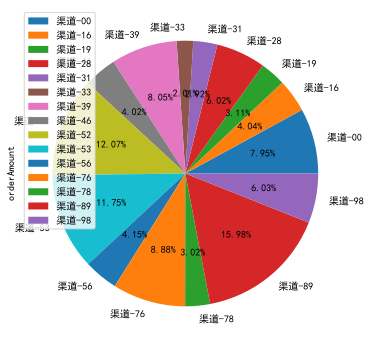

In [31]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

temp_df.plot(kind='pie', subplots=True, autopct='%.2f%%', figsize=(6, 6))
plt.show()

In [32]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.globals import ThemeType
from pyecharts.options import ToolboxOpts

In [33]:
pie = Pie(init_opts=opts.InitOpts(theme=ThemeType.DARK))
pie.add(
    "",
    data_pair=data,
    center=["50%", "60%"],
)
pie.set_global_opts(
    title_opts=opts.TitleOpts(title="Pie-调整位置"),
    legend_opts=opts.LegendOpts(pos_left="15%"),
    toolbox_opts = opts.ToolboxOpts(is_show=True, orient='vertical', pos_left='right', pos_top='center'),
)
pie.set_series_opts(
    label_opts=opts.LabelOpts(formatter="{b}: {c}"),
    tooltip_opts=opts.TooltipOpts(trigger="item", position='inside'),
)
pie.render_notebook()

In [34]:
sales_df.groupby(sales_df.orderTime.dt.weekday + 1).orderID.nunique()

orderTime
1    13119
2    14303
3    15262
4    16551
5    16521
6    14446
7    13141
Name: orderID, dtype: int64

In [35]:
# 以半小时为单位统计订单量
sales_df.groupby(sales_df.orderTime.dt.floor('30T').dt.strftime('%H-%M')).orderID.nunique()

orderTime
00-00    1064
00-30     632
01-00     382
01-30     267
02-00     139
02-30     109
03-00      72
03-30      50
04-00      33
04-30      18
05-00      20
05-30      43
06-00      68
06-30     101
07-00     182
07-30     268
08-00     418
08-30     594
09-00     929
09-30    1133
10-00    1663
10-30    1860
11-00    2352
11-30    3044
12-00    4185
12-30    5402
13-00    6654
13-30    6492
14-00    5750
14-30    4779
15-00    3669
15-30    2847
16-00    2374
16-30    2135
17-00    2085
17-30    2140
18-00    2395
18-30    2876
19-00    3773
19-30    4517
20-00    4822
20-30    4632
21-00    4019
21-30    3475
22-00    2883
22-30    2488
23-00    1945
23-30    1566
Name: orderID, dtype: int64

In [36]:
# 以月为时间窗口统计复购率
def handle_data(value):
    if ~np.isnan(value):
        return 1 if value > 1 else 0
    else:
        return value

temp_df = pd.pivot_table(sales_df, index='userID', columns='month', values='orderID', aggfunc='nunique')
temp_df = temp_df.applymap(handle_data)
temp_df.sum() / temp_df.count()

month
1     0.018266
2     0.011415
3     0.017426
4     0.020204
5     0.030539
6     0.030531
7     0.025230
8     0.031641
9     0.024713
10    0.027912
11    0.029114
12    0.030849
dtype: float64

In [37]:
temp_df = pd.pivot_table(
    sales_df.query('not chargeback'),
    index='userID',
    values=['orderTime', 'orderID', 'payment'],
    aggfunc={'orderTime': 'max', 'orderID': 'nunique', 'payment': 'sum'}
)
temp_df

,orderID,orderTime,payment
userID,,,
customer-100000,1,2021-10-13 18:46:46,2109.52
customer-100003,1,2021-05-24 13:04:05,870.17
customer-100006,1,2021-11-14 15:37:19,523.02
customer-100007,1,2021-01-14 18:45:35,2244.56
customer-100008,1,2021-11-16 17:15:03,5018.60
...,...,...,...
customer-299980,1,2021-10-18 10:53:37,644.00
customer-299983,1,2021-12-27 17:57:11,949.91
customer-299989,2,2021-11-11 10:40:08,2026.52


In [38]:
from datetime import datetime

# 计算最近一次消费时间
last_day = datetime(2021, 12, 31)
temp_df.orderTime = (last_day - temp_df.orderTime).dt.days
temp_df

,orderID,orderTime,payment
userID,,,
customer-100000,1,78,2109.52
customer-100003,1,220,870.17
customer-100006,1,46,523.02
customer-100007,1,350,2244.56
customer-100008,1,44,5018.60
...,...,...,...
customer-299980,1,73,644.00
customer-299983,1,3,949.91
customer-299989,2,49,2026.52


In [39]:
# 重命名列名
temp_df.rename(columns={'orderTime': 'R', 'orderID': 'F', 'payment': 'M'}, inplace=True)
temp_df = temp_df.reindex(columns=['R', 'F', 'M'])
temp_df

,R,F,M
userID,,,
customer-100000,78,1,2109.52
customer-100003,220,1,870.17
customer-100006,46,1,523.02
customer-100007,350,1,2244.56
customer-100008,44,1,5018.60
...,...,...,...
customer-299980,73,1,644.00
customer-299983,3,1,949.91
customer-299989,49,2,2026.52


In [40]:
# 计算R得分
def get_r_level(x):
    if x <= 7:
        return 5
    elif x <= 30:
        return 4
    elif x <= 60:
        return 3
    elif x <= 90:
        return 2
    else:
        return 1

temp_df.R = temp_df.R.apply(get_r_level)
temp_df


,R,F,M
userID,,,
customer-100000,2,1,2109.52
customer-100003,1,1,870.17
customer-100006,3,1,523.02
customer-100007,1,1,2244.56
customer-100008,3,1,5018.60
...,...,...,...
customer-299980,2,1,644.00
customer-299983,5,1,949.91
customer-299989,3,2,2026.52


In [41]:
# 计算F得分
def get_f_level(x):
    if x <= 1:
        return 1
    elif x <= 2:
        return 2
    elif x <= 3:
        return 3
    elif x <= 4:
        return 4
    else:
        return 5

temp_df.F = temp_df.F.apply(get_f_level)
temp_df

,R,F,M
userID,,,
customer-100000,2,1,2109.52
customer-100003,1,1,870.17
customer-100006,3,1,523.02
customer-100007,1,1,2244.56
customer-100008,3,1,5018.60
...,...,...,...
customer-299980,2,1,644.00
customer-299983,5,1,949.91
customer-299989,3,2,2026.52


In [42]:
temp_df.M.describe()

count    70604.000000
mean      1488.505561
std       1344.512033
min          1.670000
25%        623.400000
50%       1011.860000
75%       1946.495000
max      32919.770000
Name: M, dtype: float64

In [43]:
# 计算M得分
def get_m_level(x):
    if x <= 600:
        return 1
    elif x <= 1000:
        return 2
    elif x <= 2000:
        return 3
    elif x <= 5000:
        return 4
    else:
        return 5
    
temp_df.M = temp_df.M.apply(get_m_level)
temp_df

,R,F,M
userID,,,
customer-100000,2,1,4
customer-100003,1,1,2
customer-100006,3,1,1
customer-100007,1,1,4
customer-100008,3,1,5
...,...,...,...
customer-299980,2,1,2
customer-299983,5,1,2
customer-299989,3,2,4


In [44]:
result_df = (temp_df > temp_df.mean()).applymap(lambda x: '1' if x else '0') # 1表示高于平均值,0表示低于平均值
result_df['Tag'] = result_df.R + result_df.F + result_df.M 
result_df

,R,F,M,Tag
userID,,,,
customer-100000,1,0,1,101
customer-100003,0,0,0,000
customer-100006,1,0,0,100
customer-100007,0,0,1,001
customer-100008,1,0,1,101
...,...,...,...,...
customer-299980,1,0,0,100
customer-299983,1,0,0,100
customer-299989,1,1,1,111


In [45]:
# tag转换为pyecharts的数据格式,用字典的方式
data = []
for i in result_df.Tag.value_counts().index:
    data.append([i, result_df.Tag.value_counts()[i]])
data


[['000', 23405],
 ['001', 15034],
 ['100', 10349],
 ['111', 7887],
 ['011', 6862],
 ['101', 5859],
 ['110', 611],
 ['010', 597]]

In [46]:
labels = ['一般挽留', '重要挽留', '一般保持', '重要保持', '一般发展', '重要发展', '一般价值', '重要价值']

for i in range(len(data)):
    data[i][0] = labels[i]
data

[['一般挽留', 23405],
 ['重要挽留', 15034],
 ['一般保持', 10349],
 ['重要保持', 7887],
 ['一般发展', 6862],
 ['重要发展', 5859],
 ['一般价值', 611],
 ['重要价值', 597]]

In [56]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.globals import ThemeType


pie = Pie(init_opts=opts.InitOpts(theme=ThemeType.DARK))
pie.add(
    "",
    data_pair=[['一般挽留', 23405],
               ['重要挽留', 15034],
               ['一般保持', 10349],
               ['重要保持', 7887],
               ['一般发展', 6862],
               ['重要发展', 5859],
               ['一般价值', 611],
               ['重要价值', 597]],
    radius=["50%", "75%"], # 设置内外半径
    center=["53%", "50%"], # 设置圆心位置
)


pie.set_global_opts(
    title_opts=opts.TitleOpts(title="RFM模型"),
    legend_opts=opts.LegendOpts( # 图例
        orient="vertical", pos_top="7%", pos_left="1%"),
    toolbox_opts = opts.ToolboxOpts(is_show=True, orient='vertical', pos_left='right', pos_top='center'),
    tooltip_opts=opts.TooltipOpts(trigger="item", position='inside', formatter="RFM模型<br/>{b}: {c} ({d}%)"),
)
pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c} ({d}%)"))
pie.render_notebook()
